<a href="https://colab.research.google.com/github/AshiniAnantharaman/RIT-DSCI-633-FDS/blob/main/Assignments/Assignment_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.   Import NN Libraries






In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

# 2. Load the data from MNIST using Keras

In [33]:
mnist_dataset = tf.keras.datasets.mnist.load_data(path="mnist.npz")
 
(X_train, y_train), (X_test, y_test) = mnist_dataset
# mnist_dataset
print(X_train.shape)
print(y_train.shape)
 
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 3. Plot the image for each category of the index(i)

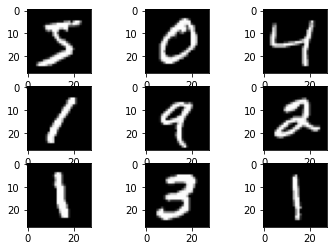

In [34]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# 4. Re-shape the X-train and X-test data with the 28 * 28 pixels

In [35]:
# Reshape data

X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
X_train.shape

(60000, 784)

# 5. Convert the range of data to be between 0 and 1 by dividing the value by 255 

In [36]:
X_train = X_train / 255
X_test = X_test / 255

# 6. Splitting the different classifications of the images

In [37]:
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

print(y_test.shape)

# (The output values are 0, 1, 2, 3, 4, 5, 6, 7, 8, 9)


(10000, 10)


# 7. Adding the different layers of NN

In [38]:
model = Sequential()
model.add(Dense(32, input_dim = 28 * 28, activation= 'sigmoid'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation  = 'softmax'))

# 8. Compiling the code with a learning rate of 0.01



In [39]:
#For the multiple classification group, the categorical cross entropy is the most appropriate
#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=sgd, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


# 9. Setting a Callback using the EarlyStopping

In [56]:
import math
from livelossplot import PlotLossesKeras

initial_learning_rate = 0.01

def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)


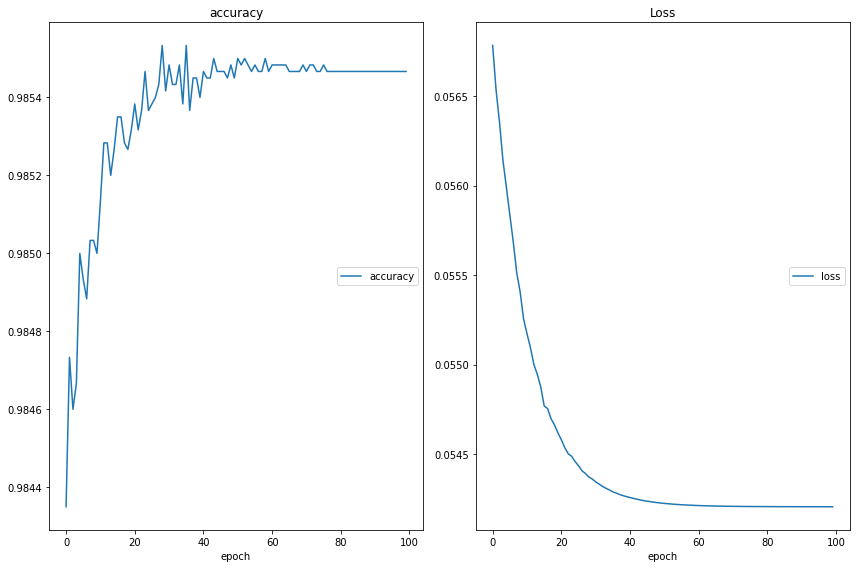

accuracy
	accuracy         	 (min:    0.984, max:    0.986, cur:    0.985)
Loss
	loss             	 (min:    0.054, max:    0.057, cur:    0.054)


In [57]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)
model.fit(X_train, y_train, epochs= 100, batch_size = 100, callbacks=[PlotLossesKeras(),es,tf.keras.callbacks.LearningRateScheduler(lr_exp_decay, verbose=1)])

In [61]:
scores = model.evaluate(X_test, y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 0s 842us/step - loss: 0.0986 - accuracy: 0.9708
Accuracy:  97.079998254776
